# MAL Determin shapes


## Problem description
TODO: hvilket problem førsøger i at løse med ML?


Our project is about detecting and clasifying four different shapes. The shapes we want to detect is Squares, Triangels, Circles and Stars. 



## The dataset
TODO: hvilke data arbejder i med, hvilke features, hvor stammer det fra osv. (tag udgangspunkt i jeres aflevering "L03 Beskrivelse af eget slutprojekt" i O1).


### Loading the Shape dataset

In [1]:
import numpy as np
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#TODO load the dataset:
import sys,os
from time import time
sys.path.append(os.path.expanduser('ProjectFunctions'))
from ProjectFunctions import LoadShapes as LS


start = time()

X, y = LS.getShapes()

t = time()-start
print(f"OK, Load time={t:0.1f}")

OK, Load time=51.8


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Star


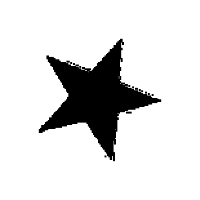

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Circle


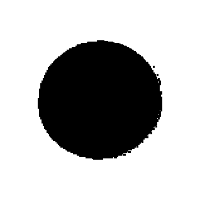

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Square


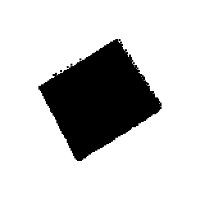

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Triangle


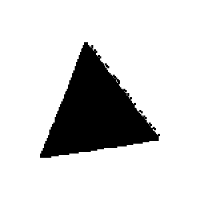

In [3]:
# Printing and controling data sample expected to be a star.
print(X[8])
print(y[8])
imStar = Image.fromarray(X[8])
display(imStar)

# Printing and controling data sample expected to be a circle.
print(X[8+3765])
print(y[8+3765])
imCircle = Image.fromarray(X[8+3765])
display(imCircle)

# Printing and controling data sample expected to be a square.
print(X[8+3765*2])
print(y[8+3765*2])
imSquare = Image.fromarray(X[8+3765*2])
display(imSquare)

# Printing and controling data sample expected to be a triangle.
print(X[8+3765*3])
print(y[8+3765*3])
imTriangle = Image.fromarray(X[8+3765*3])
display(imTriangle)

### Preprossing
TODO: descripe what we think has been done to our data in the preprossing prosses.

We are using CNN (convolutional Neural Network)

Inspiration has been found at the article [Building a Convolutional Neural Network (CNN) in Keras](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5).

In [4]:
X = np.array(X)
X_shape = X.shape
print("The shape of X: ", X_shape)

The shape of X:  (14970, 200, 200)


#### Reshaping the data to fit the CNN model
We reshape the model to have the last dimention 1 which means that the images are in greyscale.

In [5]:
X_r = X.reshape(14970, 200, 200,1)

X_rShape = X_r.shape
print("The new shape of the reshaped X: ", X_rShape)

input_X_rShape = X_rShape[1:]
print("The shape of X ready to be inputed in the CNN: ", input_X_rShape)

The new shape of the reshaped X:  (14970, 200, 200, 1)
The shape of X ready to be inputed in the CNN:  (200, 200, 1)


#### One-Hot-Encoding of the taget collum
One-hot encoding is a ML meathod that is used to transform categorical data into numerical og binary data.

Inspiration found in the article [How to One Hot Encode Sequence Data in Python](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/). 

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

# integer encoding
integer_encoded = LabelEncoder().fit_transform(y)
print("integer_encoded: ", integer_encoded)

# binary encode
y_categorical = to_categorical(integer_encoded)

# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# y_categorical = onehot_encoder.fit_transform(integer_encoded)

print("\ny_categorical:\n", y_categorical)
print("\nShape of y_categorical: ", y_categorical.shape)
print("\nStar: ", y_categorical[8], "\nCircle: ", y_categorical[8+3770], "\nSquare: ",  y_categorical[8+3770*2], "\nTriangle: ", y_categorical[8+3770*3])

integer_encoded:  [2 2 2 ... 3 3 3]

y_categorical:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

Shape of y_categorical:  (14970, 4)

Star:  [0. 0. 1. 0.] 
Circle:  [1. 0. 0. 0.] 
Square:  [0. 1. 0. 0.] 
Triangle:  [0. 0. 0. 1.]


#### Building the model

In [41]:
import keras
from keras import layers

model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3,3), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=4, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 198, 6)       60        
_________________________________________________________________
average_pooling2d_7 (Average (None, 99, 99, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 97, 16)        880       
_________________________________________________________________
average_pooling2d_8 (Average (None, 48, 48, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               4423800   
_________________________________________________________________
dense_11 (Dense)             (None, 84)                10164     
__________

#### Compiling the model

In [43]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
print("Model compiled.")

Model compiled.


### Preparing the date for neural networks

We need to change the pixel data from the range 0 - 255 to a value between 0 and 1. This is because the neurons works with step functions (in the range from 0 and 1) in the activation function step and for our data to be prossesed corrrectly in a neural network ve need to feed the network with data in the same range. 

In [38]:
X_neuralReady=np.array(X_r)/255

print("Done preparing data for neural networks.")

Done preparing data for neural networks.


### Splitting the dataset 

We're splitting the dataset to 

TODO: write twxt hwre and explain why we split!!!!!!!!!!!!!!!!!!!!!!

In [23]:
from sklearn.model_selection import train_test_split

test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)

print("Done splitting train and test data.")

Done splitting train and test data.


In [39]:

Xnr_train, Xnr_test, ynr_train, ynr_test = train_test_split(X_neuralReady, y_categorical, test_size=test_size, random_state=42, shuffle=True)

print("Done splitting train and test data ready for neural networks.")

Done splitting train and test data ready for neural networks.


#### Training the model

In [ ]:
model.fit(Xnr_train, ynr_train, validation_data = (Xnr_test, ynr_test), epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 10479 samples, validate on 4491 samples
Epoch 1/3
 9760/10479 [==========================>...] - ETA: 1:46 - loss: 0.1841 - acc: 0.9362

## Preprossing
TODO: descripe what we think has been done to our data in the preprossing prosses.

### Running our own preprossing:

In [ ]:
#TODO: try ro run a known CNN on the data and see what happens.


## ML-Algorithms
TODO: beskriv f.eks.
* hvilken grundliggende ML algoritmeklasse(r) valgte i (supervised/unsupervised, regression/classifikation)?
* hvilke kriterier lå til grund for jeres model selection?
* hvorfor er jeres valgtealgoritme god til netop jeres dataset?
* hvad er fordele og ulemper ved den (eller de) valgte algoritme(r), f.eks. kompleksitet?

### Classifying the data

In [ ]:
# Todo run algorithms:
# Todo 

## ML pipeline:
TODO: Beskrivelse af hvordan i splitter data i train-test set, preprocessere, træner og tester.

## Performance metrics:
TODO: beskrivelse af, hvordan i måler 'effektiviteten' af jeres træning og test.

## Optimeringer og forbedringer:
TODO:  hvordan har i forbedret jeres system via optimeringsparametre (optimizers, regulizers) eller afsøgning af hyperparameterrummet? 

## Under- og overfitting: 
TODO: hvordan sørger i for, at jeres system ikke under- eller overfitter på jeres data?

## Diskussion (ikke et krav)
TODO: Diskuter hvad man ellers kunne gøre med dataen, mere data? præprossesering.

## Konklussion
TODO: Konklussionen på opgaven